In [ ]:
# ==============================================================================
# SETUP & CSV LOADING
# ==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
df = pd.read_csv('ecommerce_customer_data_large.csv')
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset shape: (250000, 13)

Columns: ['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn']


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
# ==============================================================================
# EXPLORATION
# ==============================================================================

print("Data types:")
print(df.dtypes)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print(f"\nDate range: {df['Purchase Date'].min()} to {df['Purchase Date'].max()}")
print(f"Unique customers: {df['Customer ID'].nunique()}")
print(f"Unique products: {df['Product Category'].nunique()}")

Data types:
Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

Date range: 2020-01-01 00:07:26 to 2023-09-13 18:42:49
Unique customers: 49661
Unique products: 4


In [ ]:
# Convert date column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create additional date columns for analysis
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Day'] = df['Purchase Date'].dt.day
df['Weekday'] = df['Purchase Date'].dt.day_name()


print("New columns added!")
display(df.head())

New columns added!


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year,Month,Day,Weekday
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,2023,5,3,Wednesday
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,2021,5,16,Sunday
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,2020,7,13,Monday
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,2023,1,17,Tuesday
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,2021,5,1,Saturday


METRICES & VISUALIZATIONS

In [ ]:
# Calculate key metrics
total_revenue = df['Total Purchase Amount'].sum()
total_transactions = df.shape[0] # Count the number of rows as transactions
total_customers = df['Customer ID'].nunique()
avg_order_value = total_revenue / total_transactions
total_products_sold = df['Quantity'].sum()

# Ensure 'Purchase Date' is in datetime format before calculating the difference
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
average_customers_per_day = total_customers / (df['Purchase Date'].max() - df['Purchase Date'].min()).days

print("=== KEY PERFORMANCE INDICATORS ===")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"🛒 Total Transactions: {total_transactions:,}")
print(f"👥 Total Customers: {total_customers:,}")
print(f"📈 Average Order Value: ${avg_order_value:.2f}")
print(f"📦 Total Products Sold: {total_products_sold:,}")
print(f"👥 Average Daily Customers: {average_customers_per_day:.2f}")

=== KEY PERFORMANCE INDICATORS ===
💰 Total Revenue: $681,346,299.00
🛒 Total Transactions: 250,000
👥 Total Customers: 49,661
📈 Average Order Value: $2725.39
📦 Total Products Sold: 751,234
👥 Average Daily Customers: 36.76


In [ ]:
# Monthly revenue trend
# Ensure 'Purchase Date' is in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Create Year and Month columns
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

monthly_revenue = df.groupby(['Year', 'Month'])['Total Purchase Amount'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(day=1))

print("\nMonthly Revenue:")
print(monthly_revenue)


Monthly Revenue:
    Year  Month  Total Purchase Amount       Date
0   2020      1               15566765 2020-01-01
1   2020      2               14660710 2020-02-01
2   2020      3               15517357 2020-03-01
3   2020      4               15060419 2020-04-01
4   2020      5               15517765 2020-05-01
5   2020      6               15062859 2020-06-01
6   2020      7               15575247 2020-07-01
7   2020      8               16190648 2020-08-01
8   2020      9               15134038 2020-09-01
9   2020     10               15758325 2020-10-01
10  2020     11               15281984 2020-11-01
11  2020     12               15551387 2020-12-01
12  2021      1               15415212 2021-01-01
13  2021      2               14310637 2021-02-01
14  2021      3               15386324 2021-03-01
15  2021      4               14955947 2021-04-01
16  2021      5               15597852 2021-05-01
17  2021      6               15103252 2021-06-01
18  2021      7               15

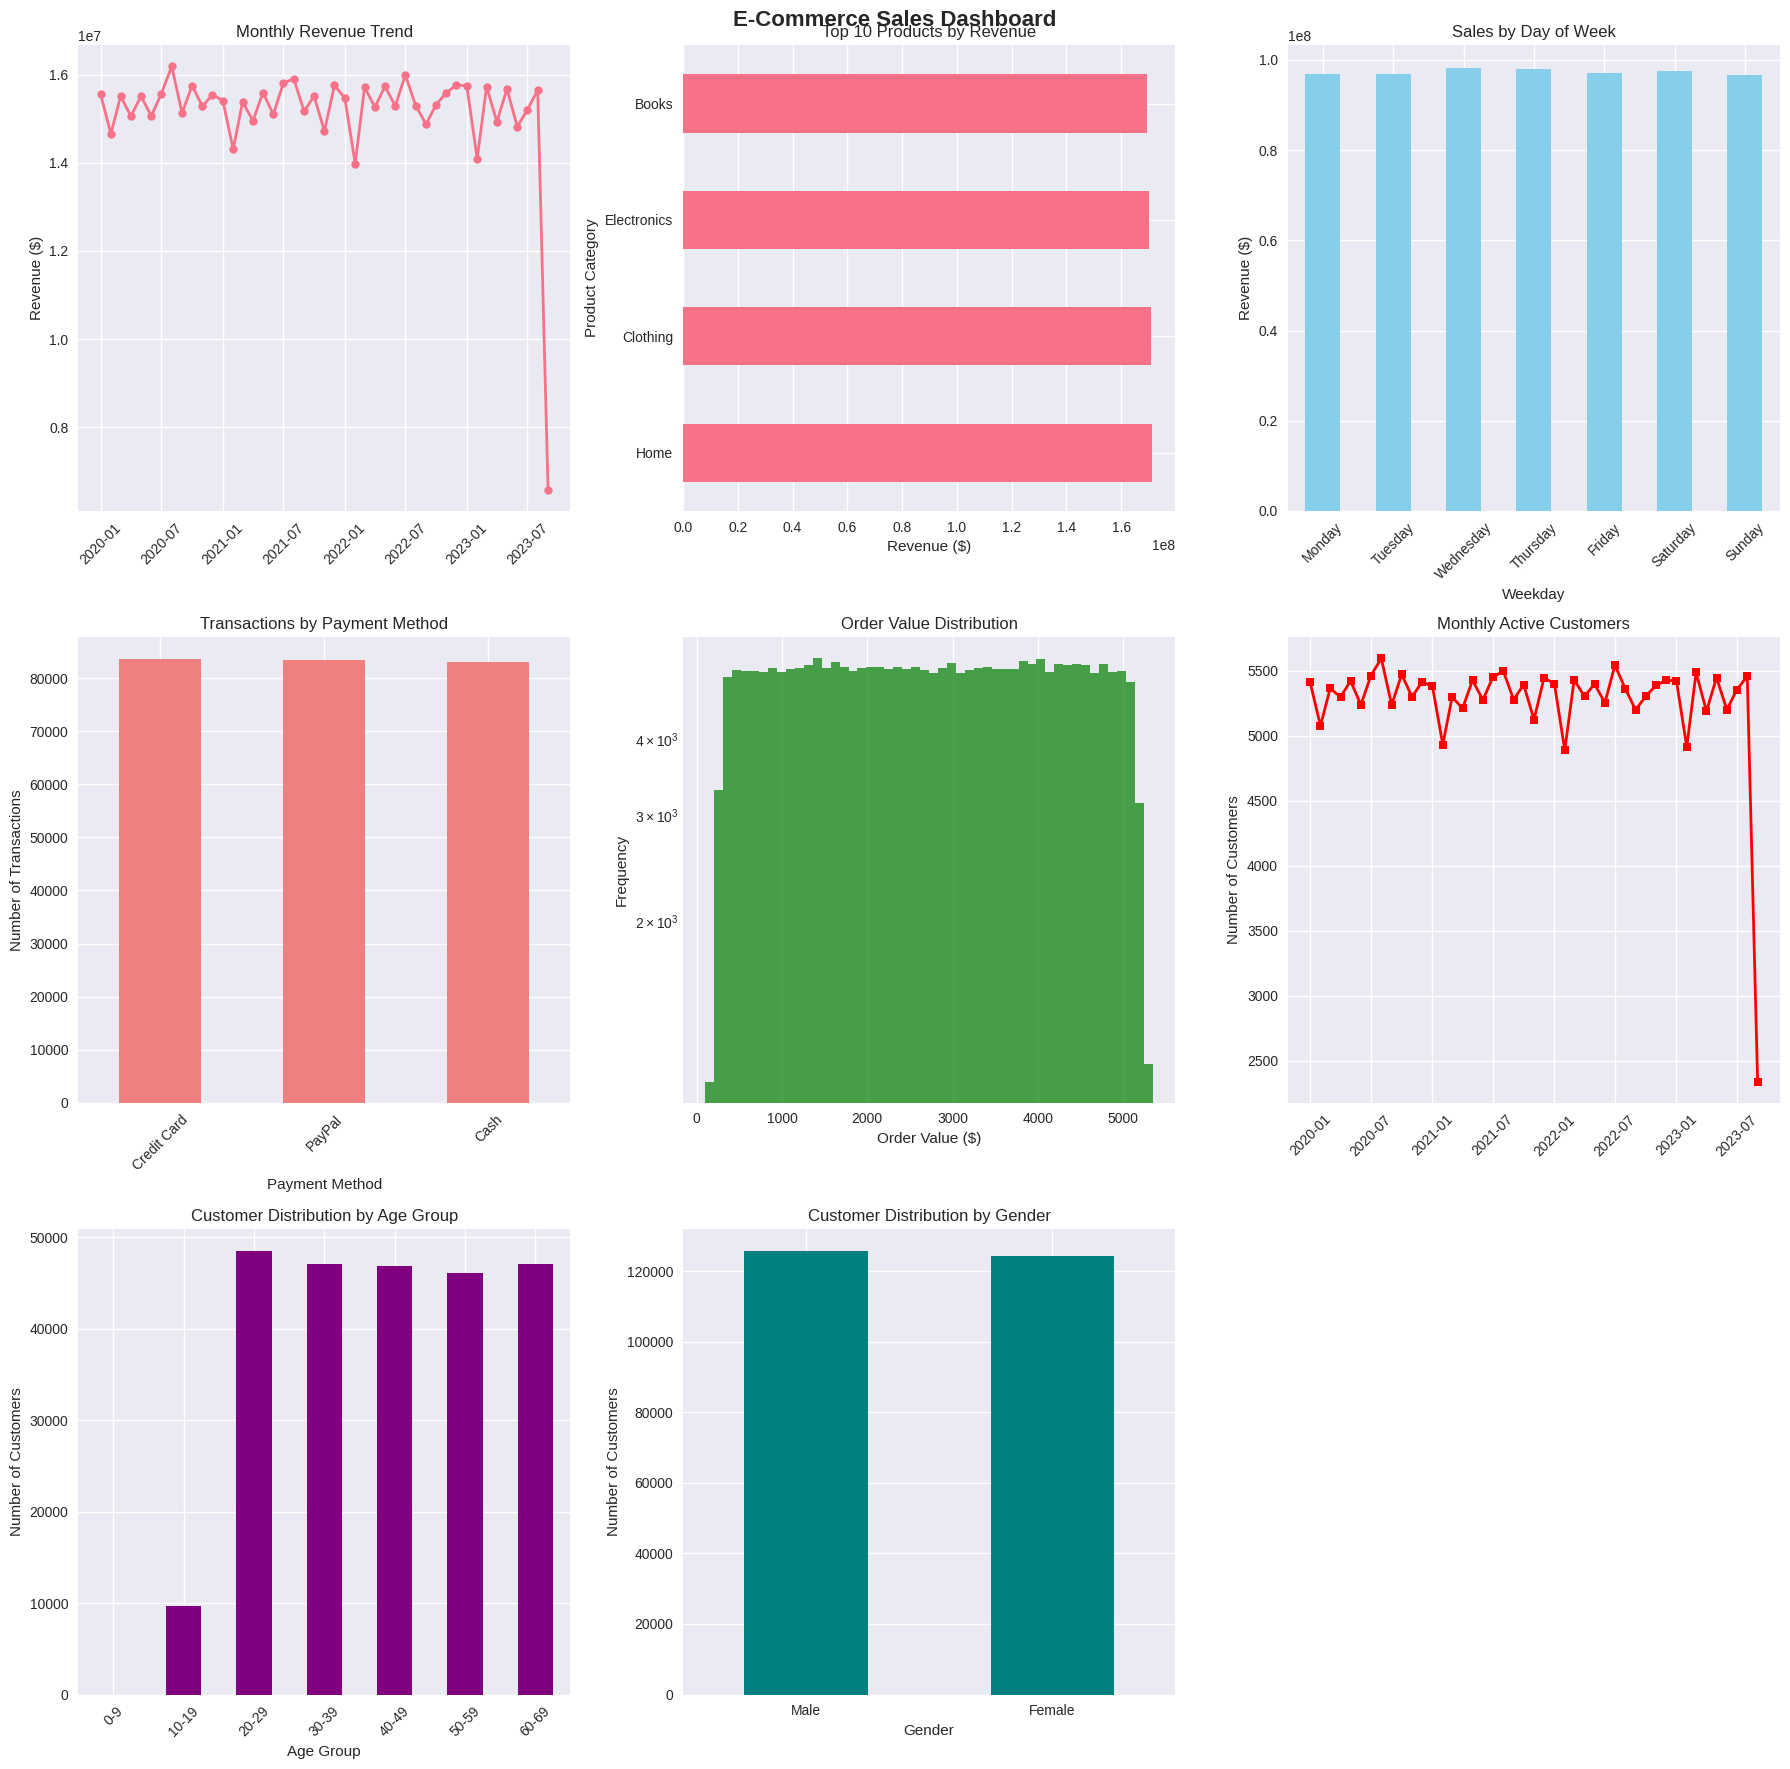

In [ ]:
# Create a comprehensive dashboard with a 3x3 layout
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('E-Commerce Sales Dashboard', fontsize=16, fontweight='bold')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Monthly Revenue Trend
axes[0].plot(monthly_revenue['Date'], monthly_revenue['Total Purchase Amount'],
                marker='o', linewidth=2, markersize=6)
axes[0].set_title('Monthly Revenue Trend')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)

# 2. Top 10 Products by Revenue
product_revenue = df.groupby('Product Category')['Total Purchase Amount'].sum().nlargest(10)
product_revenue.plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 Products by Revenue')
axes[1].set_xlabel('Revenue ($)')

# 3. Sales by Day of Week
# Ensure 'Purchase Date' is in datetime format and create Weekday column
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Weekday'] = df['Purchase Date'].dt.day_name()

daily_sales = df.groupby('Weekday')['Total Purchase Amount'].sum()
# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)
daily_sales.plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Sales by Day of Week')
axes[2].set_ylabel('Revenue ($)')
axes[2].tick_params(axis='x', rotation=45)

# 4. Transactions by Payment Method
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='bar', ax=axes[3], color='lightcoral')
axes[3].set_title('Transactions by Payment Method')
axes[3].set_ylabel('Number of Transactions')
axes[3].tick_params(axis='x', rotation=45)

# 5. Order Value Distribution
axes[4].hist(df.groupby(df.index)['Total Purchase Amount'].sum(), bins=50, alpha=0.7, color='green')
axes[4].set_title('Order Value Distribution')
axes[4].set_xlabel('Order Value ($)')
axes[4].set_ylabel('Frequency')
axes[4].set_yscale('log')

# 6. Monthly Customer Count
# Ensure 'Purchase Date' is in datetime format and create Year and Month columns for this plot
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
monthly_customers = df.groupby(['Year', 'Month'])['Customer ID'].nunique().reset_index()
monthly_customers['Date'] = pd.to_datetime(monthly_customers[['Year', 'Month']].assign(day=1))
axes[5].plot(monthly_customers['Date'], monthly_customers['Customer ID'],
                marker='s', linewidth=2, markersize=6, color='red')
axes[5].set_title('Monthly Active Customers')
axes[5].set_ylabel('Number of Customers')
axes[5].tick_params(axis='x', rotation=45)

# 7. Customer Distribution by Age Group
# Define age bins and labels
age_bins = list(range(0, df['Customer Age'].max() + 10, 10))
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels, right=False)
customer_age_distribution = df['Age Group'].value_counts().sort_index()
customer_age_distribution.plot(kind='bar', ax=axes[6], color='purple')
axes[6].set_title('Customer Distribution by Age Group')
axes[6].set_xlabel('Age Group')
axes[6].set_ylabel('Number of Customers')
axes[6].tick_params(axis='x', rotation=45)

# 8. Customer Distribution by Gender
customer_gender_distribution = df['Gender'].value_counts()
customer_gender_distribution.plot(kind='bar', ax=axes[7], color='teal')
axes[7].set_title('Customer Distribution by Gender')
axes[7].set_xlabel('Gender')
axes[7].set_ylabel('Number of Customers')
axes[7].tick_params(axis='x', rotation=0)

# Hide the last empty subplot
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

In [ ]:
# Customer segmentation analysis
customer_metrics = df.groupby('Customer ID').agg(
    CustomerName=('Customer Name', 'first'), # Include customer name
    OrderCount=('Purchase Date', 'nunique'),  # Number of orders
    TotalSpent=('Total Purchase Amount', 'sum'),    # Total spent
    LastPurchase=('Purchase Date', 'max')     # Last purchase date
)

# Calculate days since last purchase
customer_metrics['DaysSinceLastPurchase'] = (datetime.now() - customer_metrics['LastPurchase']).dt.days

print("=== CUSTOMER SEGMENTATION ===")
print("\nTop 10 Customers by Total Spent:")
print(customer_metrics.nlargest(10, 'TotalSpent')[['CustomerName', 'OrderCount', 'TotalSpent']])

# Simple customer segments
def segment_customer(row):
    if row['TotalSpent'] > 1000 and row['OrderCount'] > 5:
        return 'VIP'
    elif row['TotalSpent'] > 500:
        return 'High Value'
    elif row['OrderCount'] > 3:
        return 'Frequent'
    else:
        return 'Regular'

customer_metrics['Segment'] = customer_metrics.apply(segment_customer, axis=1)
print("\nCustomer Segments:")
print(customer_metrics['Segment'].value_counts())

=== CUSTOMER SEGMENTATION ===

Top 10 Customers by Total Spent:
                  CustomerName  OrderCount  TotalSpent
Customer ID                                           
39895        Reginald Gonzales          15       50659
39717            Joseph Kaiser          14       50496
48382            Katelyn Clark          17       50179
6633             Andre Spencer          13       48499
49743           Bryan Gonzalez          14       47015
22821           Larry Phillips          12       46939
24468            Antonio Smith          14       46683
13805          Timothy Proctor          15       46567
539               Brad Sanford          13       46390
19960           Patrick Gamble          14       46255

Customer Segments:
Segment
High Value    30456
VIP           19118
Regular          87
Name: count, dtype: int64


**MORE ADVANCED SEGMENTATION**

In [ ]:
# Calculate RFM metrics
rfm_df = df.groupby('Customer ID').agg(
    Recency=('Purchase Date', lambda date: (datetime.now() - date.max()).days),
    Frequency=('Purchase Date', 'nunique'),
    Monetary=('Total Purchase Amount', 'sum')
).reset_index()

print("RFM Metrics:")
display(rfm_df.head())

RFM Metrics:


,Customer ID,Recency,Frequency,Monetary
0,1,999,3,6290
1,2,782,6,16481
2,3,933,4,9423
3,4,1152,5,7826
4,5,1135,5,9769


In [ ]:
# Segment customers based on RFM scores (using quantiles)
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1]) # Lower recency is better
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4]) # Higher frequency is better
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4]) # Higher monetary value is better

# Combine the RFM scores to create segments
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

print("\nRFM Segments:")
display(rfm_df.head())


RFM Segments:


,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,1,999,3,6290,2,1,1,211
1,2,782,6,16481,4,3,3,433
2,3,933,4,9423,2,2,2,222
3,4,1152,5,7826,1,2,1,121
4,5,1135,5,9769,1,2,2,122


In [ ]:
# Analyze the distribution of customers across RFM segments
print("\nDistribution of Customers Across RFM Segments:")
display(rfm_df['RFM_Score'].value_counts().head(10))

# Calculate the average RFM values for each segment
print("\nAverage RFM Values per Segment:")
display(rfm_df.groupby('RFM_Score')[['Recency', 'Frequency', 'Monetary']].mean().head(10))


Distribution of Customers Across RFM Segments:


,count
RFM_Score,
111,4865
444,3482
344,2838
222,2140
211,2122
244,2072
322,2011
122,1908
422,1791



Average RFM Values per Segment:


,Recency,Frequency,Monetary
RFM_Score,,,
111,1423.590750,2.072765,5008.871120
112,1333.821192,2.896523,10256.572848
113,1319.257143,3.000000,13644.542857
121,1280.197080,4.167883,7145.265693
122,1269.034591,4.345388,10958.836478
123,1258.198381,4.589744,14952.844130
124,1252.286458,4.942708,19348.125000
131,1211.894737,6.000000,7888.894737
132,1214.727749,6.000000,11422.780105


**PREDICTIVE MODELLING FOR BOTH CHURN AND FUTURE PURCHASE BEHAVIOUR**

In [ ]:
# 1. Identify the churn column
print("Unique values in 'Churn' column:", df['Churn'].unique())
print("Missing values in 'Churn' column:", df['Churn'].isnull().sum())

df_cleaned = df.dropna(subset=['Churn']).copy()

df_cleaned['Churn'] = df_cleaned['Churn'].astype(int)


# 2. Select relevant features from the original df DataFrame

customer_features_agg = df_cleaned.groupby('Customer ID').agg(
    CustomerAge=('Customer Age', 'first'), # Assuming age is consistent per customer
    Gender=('Gender', 'first'), # Assuming gender is consistent per customer
    MostFrequentProductCategory=('Product Category', lambda x: x.mode()[0] if not x.mode().empty else None),
    MostFrequentPaymentMethod=('Payment Method', lambda x: x.mode()[0] if not x.mode().empty else None),
    TotalReturns=('Returns', 'sum') # Sum of returns per customer
).reset_index()

# Convert categorical features to dummy variables
customer_features_agg = pd.get_dummies(customer_features_agg, columns=['Gender', 'MostFrequentProductCategory', 'MostFrequentPaymentMethod'], drop_first=True)


# 3. Merge the selected features from df with the rfm_df DataFrame

print("\nData types of customer_features_agg:")
print(customer_features_agg.dtypes)
print("\nData types of rfm_df:")
print(rfm_df.dtypes)

churn_data = pd.merge(rfm_df, customer_features_agg, on='Customer ID', how='inner')

customer_churn_status = df_cleaned.groupby('Customer ID')['Churn'].first().reset_index()
churn_data = pd.merge(churn_data, customer_churn_status, on='Customer ID', how='inner')


# 4. Handle any missing values that may arise after merging
print("\nMissing values after merge:")
print(churn_data.isnull().sum())

churn_data.dropna(inplace=True)


# 5. Define the final feature set (X) and the target variable (y)

X = churn_data.drop(columns=['Customer ID', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Churn']) # RFM scores are derived from Recency, Frequency, Monetary
y = churn_data['Churn']

print("\nShape of feature set (X):", X.shape)
print("Shape of target variable (y):", y.shape)
print("\nFeatures (X) columns:", X.columns.tolist())
print("\nTarget variable (y) head:")
display(y.head())

Unique values in 'Churn' column: [0 1]
Missing values in 'Churn' column: 0

Data types of customer_features_agg:
Customer ID                                  int64
CustomerAge                                  int64
TotalReturns                               float64
Gender_Male                                   bool
MostFrequentProductCategory_Clothing          bool
MostFrequentProductCategory_Electronics       bool
MostFrequentProductCategory_Home              bool
MostFrequentPaymentMethod_Credit Card         bool
MostFrequentPaymentMethod_PayPal              bool
dtype: object

Data types of rfm_df:
Customer ID       int64
Recency           int64
Frequency         int64
Monetary          int64
R_score        category
F_score        category
M_score        category
RFM_Score        object
dtype: object

Missing values after merge:
Customer ID                                0
Recency                                    0
Frequency                                  0
Monetary             

,Churn
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Inspect the columns of customer_metrics to identify the correct column names
print("Columns in customer_metrics:")
print(customer_metrics.columns)

# Reset index of customer_metrics to make 'Customer ID' a column for merging
customer_metrics_reset = customer_metrics.reset_index()
print("\nColumns in customer_metrics after reset_index:")
print(customer_metrics_reset.columns)

# Drop the incomplete merge result if it exists
if 'OrderCount' in churn_data.columns:
    churn_data = churn_data.drop(columns=['OrderCount']) # Drop only OrderCount as TotalReturns was already dropped or not added

# Merge churn_data with customer_metrics_reset to get 'OrderCount'
print("\nData types of Customer ID in churn_data:", churn_data['Customer ID'].dtype)
print("Data types of Customer ID in customer_metrics_reset:", customer_metrics_reset['Customer ID'].dtype)

churn_data = pd.merge(churn_data, customer_metrics_reset[['Customer ID', 'OrderCount']], on='Customer ID', how='left')

# confirm the columns in churn_data before calculating ReturnFrequency
print("\nColumns in churn_data before calculating ReturnFrequency:")
print(churn_data.columns)


# 1. Re-Calculate Average Order Value
churn_data['AverageOrderValue'] = churn_data['Monetary'] / churn_data['Frequency']

# 2. Calculate Return Frequency
churn_data['ReturnFrequency'] = np.where(churn_data['OrderCount'] == 0, 0, churn_data['TotalReturns'] / churn_data['OrderCount'])

# Handle potential NaNs from TotalReturns or OrderCount if any slipped through
churn_data['ReturnFrequency'] = churn_data['ReturnFrequency'].fillna(0)


# 3. Create Interaction between Recency and Frequency
churn_data['Recency_Frequency_Interaction'] = churn_data['Recency'] * churn_data['Frequency']

# Interaction between Monetary and Customer Age
churn_data['Monetary_CustomerAge_Interaction'] = churn_data['Monetary'] * churn_data['CustomerAge']

# Interaction between Frequency and Monetary
churn_data['Frequency_Monetary_Interaction'] = churn_data['Frequency'] * churn_data['Monetary']


# 4. Update the feature set X to include the newly engineered features
X = churn_data.drop(columns=['Customer ID', 'R_score', 'F_score', 'M_score', 'RFM_Score', 'Churn', 'OrderCount', 'TotalReturns'])


# 5. Display the first few rows of the updated X DataFrame
print("\nUpdated feature set (X) head with new features:")
display(X.head())

Columns in customer_metrics:
Index(['CustomerName', 'OrderCount', 'TotalSpent', 'LastPurchase',
       'DaysSinceLastPurchase', 'Segment'],
      dtype='object')

Columns in customer_metrics after reset_index:
Index(['Customer ID', 'CustomerName', 'OrderCount', 'TotalSpent',
       'LastPurchase', 'DaysSinceLastPurchase', 'Segment'],
      dtype='object')

Data types of Customer ID in churn_data: int64
Data types of Customer ID in customer_metrics_reset: int64

Columns in churn_data before calculating ReturnFrequency:
Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score',
       'M_score', 'RFM_Score', 'CustomerAge', 'TotalReturns', 'Gender_Male',
       'MostFrequentProductCategory_Clothing',
       'MostFrequentProductCategory_Electronics',
       'MostFrequentProductCategory_Home',
       'MostFrequentPaymentMethod_Credit Card',
       'MostFrequentPaymentMethod_PayPal', 'Churn', 'OrderCount'],
      dtype='object')

Updated feature set (X) head with new fea

,Recency,Frequency,Monetary,CustomerAge,Gender_Male,MostFrequentProductCategory_Clothing,MostFrequentProductCategory_Electronics,MostFrequentProductCategory_Home,MostFrequentPaymentMethod_Credit Card,MostFrequentPaymentMethod_PayPal,AverageOrderValue,ReturnFrequency,Recency_Frequency_Interaction,Monetary_CustomerAge_Interaction,Frequency_Monetary_Interaction
0,999,3,6290,67,False,False,False,False,True,False,2096.666667,0.000000,2997,421430,18870
1,782,6,16481,42,False,False,True,False,False,True,2746.833333,0.666667,4692,692202,98886
2,933,4,9423,31,True,False,True,False,True,False,2355.750000,0.000000,3732,292113,37692
3,1152,5,7826,37,True,False,False,False,False,False,1565.200000,0.600000,5760,289562,39130
4,1135,5,9769,24,False,False,False,True,True,False,1953.800000,0.600000,5675,234456,48845


In [ ]:
# 1. Evaluate dataset characteristics based on previous steps:
print("Shape of feature set (X):", X.shape)
print("Feature data types:\n", X.dtypes)

# Choosing Random Forest and LightGBM as initial models.

print("\nSelected Models for Churn Prediction:")
print("- Random Forest Classifier: Robust, handles non-linearity, good general performance.")
print("- LightGBM Classifier: High performance, efficient, handles mixed data types well.")

Shape of feature set (X): (49661, 15)
Feature data types:
 Recency                                      int64
Frequency                                    int64
Monetary                                     int64
CustomerAge                                  int64
Gender_Male                                   bool
MostFrequentProductCategory_Clothing          bool
MostFrequentProductCategory_Electronics       bool
MostFrequentProductCategory_Home              bool
MostFrequentPaymentMethod_Credit Card         bool
MostFrequentPaymentMethod_PayPal              bool
AverageOrderValue                          float64
ReturnFrequency                            float64
Recency_Frequency_Interaction                int64
Monetary_CustomerAge_Interaction             int64
Frequency_Monetary_Interaction               int64
dtype: object

Selected Models for Churn Prediction:
- Random Forest Classifier: Robust, handles non-linearity, good general performance.
- LightGBM Classifier: High performanc

In [ ]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Instantiate and train RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

# 4. Instantiate and train LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)
print("\nTraining LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("LightGBM model trained.")

Shape of X_train: (39728, 15)
Shape of X_test: (9933, 15)
Shape of y_train: (39728,)
Shape of y_test: (9933,)

Training Random Forest model...
Random Forest model trained.

Training LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7950, number of negative: 31778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 39728, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200111 -> initscore=-1.385602
[LightGBM] [Info] Start training from score -1.385602
LightGBM model trained.


In [ ]:
# 1. Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 2. Use the trained Random Forest model (rf_model) to make predictions on the test set features (X_test).
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

# 3. Calculate the accuracy, precision, recall, F1-score, and ROC-AUC score for the Random Forest model.
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

# 4. Print the calculated evaluation metrics for the Random Forest model.
print("--- Random Forest Model Evaluation ---")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC Score: {rf_roc_auc:.4f}")
print("-" * 36)

--- Random Forest Model Evaluation ---
Accuracy: 0.7976
Precision: 0.1026
Recall: 0.0020
F1-Score: 0.0040
ROC-AUC Score: 0.4997
------------------------------------


In [ ]:
# 5. Use the trained LightGBM model (lgbm_model) to make predictions on the test set features (X_test).
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

# 6. Calculate the accuracy, precision, recall, F1-score, and ROC-AUC score for the LightGBM model.
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_proba)

# 7. Print the calculated evaluation metrics for the LightGBM model.
print("--- LightGBM Model Evaluation ---")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"Precision: {lgbm_precision:.4f}")
print(f"Recall: {lgbm_recall:.4f}")
print(f"F1-Score: {lgbm_f1:.4f}")
print(f"ROC-AUC Score: {lgbm_roc_auc:.4f}")
print("-" * 35)

# 8. Briefly compare the performance of the two models.
print("\n--- Model Comparison ---")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")
print(f"LightGBM ROC-AUC: {lgbm_roc_auc:.4f}")

if lgbm_roc_auc > rf_roc_auc:
    print("LightGBM performs slightly better than Random Forest based on ROC-AUC score.")
elif rf_roc_auc > lgbm_roc_auc:
     print("Random Forest performs slightly better than LightGBM based on ROC-AUC score.")
else:
    print("Random Forest and LightGBM perform similarly based on ROC-AUC score.")

print("\nNote: For imbalanced datasets like churn, metrics like Precision, Recall, F1-Score, and ROC-AUC are more informative than Accuracy.")
print("Both models show very low Recall, indicating they are not effectively identifying churning customers.")

--- LightGBM Model Evaluation ---
Accuracy: 0.8008
Precision: 0.5000
Recall: 0.0005
F1-Score: 0.0010
ROC-AUC Score: 0.5080
-----------------------------------

--- Model Comparison ---
Random Forest ROC-AUC: 0.4997
LightGBM ROC-AUC: 0.5080
LightGBM performs slightly better than Random Forest based on ROC-AUC score.

Note: For imbalanced datasets like churn, metrics like Precision, Recall, F1-Score, and ROC-AUC are more informative than Accuracy.
Both models show very low Recall, indicating they are not effectively identifying churning customers.


In [ ]:
# 1. Determine the timeframe for predicting future purchases by defining the prediction period as the next quarter after the last purchase date in the dataset.
last_purchase_date = df['Purchase Date'].max()
prediction_start_date = last_purchase_date + pd.DateOffset(days=1)
prediction_end_date = prediction_start_date + pd.DateOffset(months=3) - pd.DateOffset(days=1) # Next quarter

print(f"Last purchase date in dataset: {last_purchase_date}")
print(f"Prediction period start date: {prediction_start_date}")
print(f"Prediction period end date: {prediction_end_date}")

# 2. Define the target variable (Total Purchase Amount in the next quarter)
future_purchases = df[(df['Purchase Date'] >= prediction_start_date) & (df['Purchase Date'] <= prediction_end_date)].copy()
customer_future_revenue = future_purchases.groupby('Customer ID')['Total Purchase Amount'].sum().reset_index()
customer_future_revenue.rename(columns={'Total Purchase Amount': 'FutureTotalPurchaseAmount'}, inplace=True)

# 3. Prepare the feature set based on historical data before the prediction period
historical_data = df[df['Purchase Date'] < prediction_start_date].copy()

customer_historical_features = historical_data.groupby('Customer ID').agg(
    HistoricalTotalPurchaseAmount=('Total Purchase Amount', 'sum'),
    HistoricalOrderCount=('Purchase Date', 'nunique'),
    LastHistoricalPurchaseDate=('Purchase Date', 'max')
).reset_index()

# Calculate historical recency
customer_historical_features['HistoricalRecency'] = (prediction_start_date - customer_historical_features['LastHistoricalPurchaseDate']).dt.days

# Merge with existing customer characteristics (assuming CustomerAge and Gender are consistent)
customer_characteristics = df.groupby('Customer ID').agg({
    'Customer Age': 'first',
    'Gender': 'first'
}).reset_index()

# Merge historical features with customer characteristics
customer_data = pd.merge(customer_historical_features, customer_characteristics, on='Customer ID', how='inner')

# Convert categorical features to dummy variables
customer_data = pd.get_dummies(customer_data, columns=['Gender'], drop_first=True)


# 4. Combine historical features with the target variable
final_customer_data = pd.merge(customer_data, customer_future_revenue, on='Customer ID', how='left')

# Fill missing values in the target variable with 0 (customers who did not purchase in the future period)
final_customer_data['FutureTotalPurchaseAmount'] = final_customer_data['FutureTotalPurchaseAmount'].fillna(0)

# Drop the intermediate last purchase date column
final_customer_data.drop(columns=['LastHistoricalPurchaseDate'], inplace=True)

print("\nPrepared Data for Future Purchase Prediction:")
display(final_customer_data.head())
print("\nShape of final_customer_data:", final_customer_data.shape)
print("\nColumns in final_customer_data:", final_customer_data.columns.tolist())

Last purchase date in dataset: 2023-09-13 18:42:49
Prediction period start date: 2023-09-14 18:42:49
Prediction period end date: 2023-12-13 18:42:49

Prepared Data for Future Purchase Prediction:


,Customer ID,HistoricalTotalPurchaseAmount,HistoricalOrderCount,HistoricalRecency,Customer Age,Gender_Male,FutureTotalPurchaseAmount
0,1,6290,3,289,67,False,0.0
1,2,16481,6,73,42,False,0.0
2,3,9423,4,223,31,True,0.0
3,4,7826,5,442,37,True,0.0
4,5,9769,5,425,24,False,0.0



Shape of final_customer_data: (49661, 7)

Columns in final_customer_data: ['Customer ID', 'HistoricalTotalPurchaseAmount', 'HistoricalOrderCount', 'HistoricalRecency', 'Customer Age', 'Gender_Male', 'FutureTotalPurchaseAmount']


In [ ]:
# 1. Calculate 'AverageOrderValue' by dividing 'HistoricalTotalPurchaseAmount' by 'HistoricalOrderCount'
final_customer_data['AverageOrderValue'] = final_customer_data['HistoricalTotalPurchaseAmount'] / final_customer_data['HistoricalOrderCount']

# Handle potential division by zero (customers with 0 orders)
final_customer_data['AverageOrderValue'] = final_customer_data['AverageOrderValue'].replace([np.inf, -np.inf], 0).fillna(0)

# 2. Identify the most frequent product category for each customer from the historical_data DataFrame
def get_most_frequent(series):
    if series.empty:
        return None
    # Ensure series is not empty before calling mode()
    mode_result = series.mode()
    if mode_result.empty:
        return None
    return mode_result[0]

most_frequent_category = historical_data.groupby('Customer ID')['Product Category'].apply(get_most_frequent).reset_index()
most_frequent_category.rename(columns={'Product Category': 'MostFrequentProductCategory'}, inplace=True)


# 3. Merge the most frequent product category information into the final_customer_data DataFrame
final_customer_data = pd.merge(final_customer_data, most_frequent_category, on='Customer ID', how='left')

# Fill any potential NaNs in 'MostFrequentProductCategory' that might occur if a customer had no historical purchases
final_customer_data['MostFrequentProductCategory'] = final_customer_data['MostFrequentProductCategory'].fillna('Unknown')


# 4. Create dummy variables for the 'MostFrequentProductCategory' column
final_customer_data = pd.get_dummies(final_customer_data, columns=['MostFrequentProductCategory'], prefix='MostFrequentProductCategory', drop_first=True)


# 5. Define the final feature set (X) and the target variable (y)
X = final_customer_data.drop(columns=['Customer ID', 'FutureTotalPurchaseAmount'])
y = final_customer_data['FutureTotalPurchaseAmount']

# 6. Display the first few rows of the updated X DataFrame and its shape/columns
print("\nUpdated feature set (X) head with new features:")
display(X.head())
print("\nShape of feature set (X):", X.shape)
print("\nFeatures (X) columns:", X.columns.tolist())


Updated feature set (X) head with new features:


,HistoricalTotalPurchaseAmount,HistoricalOrderCount,HistoricalRecency,Customer Age,Gender_Male,AverageOrderValue,MostFrequentProductCategory_Clothing,MostFrequentProductCategory_Electronics,MostFrequentProductCategory_Home
0,6290,3,289,67,False,2096.666667,False,False,False
1,16481,6,73,42,False,2746.833333,False,True,False
2,9423,4,223,31,True,2355.750000,False,True,False
3,7826,5,442,37,True,1565.200000,False,False,False
4,9769,5,425,24,False,1953.800000,False,False,True



Shape of feature set (X): (49661, 9)

Features (X) columns: ['HistoricalTotalPurchaseAmount', 'HistoricalOrderCount', 'HistoricalRecency', 'Customer Age', 'Gender_Male', 'AverageOrderValue', 'MostFrequentProductCategory_Clothing', 'MostFrequentProductCategory_Electronics', 'MostFrequentProductCategory_Home']


In [ ]:
# 1. Review dataset characteristics
print("Shape of feature set (X):", X.shape)
print("Feature data types:\n", X.dtypes)
print("\nTarget variable (y) head:")
display(y.head())
print("\nTarget variable (y) descriptive statistics:")
display(y.describe())

# choosing Random Forest Regressor and LightGBM Regressor as initial models.

print("\nSelected Models for Future Purchase Prediction:")
print("- Random Forest Regressor: Robust, handles non-linearity and interactions, good general performance.")
print("- LightGBM Regressor: High performance, efficient, handles mixed data types well, good for large datasets.")

Shape of feature set (X): (49661, 9)
Feature data types:
 HistoricalTotalPurchaseAmount                int64
HistoricalOrderCount                         int64
HistoricalRecency                            int64
Customer Age                                 int64
Gender_Male                                   bool
AverageOrderValue                          float64
MostFrequentProductCategory_Clothing          bool
MostFrequentProductCategory_Electronics       bool
MostFrequentProductCategory_Home              bool
dtype: object

Target variable (y) head:


,FutureTotalPurchaseAmount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0



Target variable (y) descriptive statistics:


,FutureTotalPurchaseAmount
count,49661.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0



Selected Models for Future Purchase Prediction:
- Random Forest Regressor: Robust, handles non-linearity and interactions, good general performance.
- LightGBM Regressor: High performance, efficient, handles mixed data types well, good for large datasets.


In [ ]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Instantiate and train RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)
print("\nTraining Random Forest Regressor model...")
rf_regressor.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# 4. Instantiate and train LightGBM Regressor model
lgbm_regressor = lgb.LGBMRegressor(random_state=42)
print("\nTraining LightGBM Regressor model...")
lgbm_regressor.fit(X_train, y_train)
print("LightGBM Regressor model trained.")

Shape of X_train: (39728, 9)
Shape of X_test: (9933, 9)
Shape of y_train: (39728,)
Shape of y_test: (9933,)

Training Random Forest Regressor model...
Random Forest Regressor model trained.

Training LightGBM Regressor model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 39728, number of used features: 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with pos

In [ ]:
# 1. Import necessary regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Use the trained Random Forest Regressor model (rf_regressor) to make predictions on the test set features (X_test).
rf_pred = rf_regressor.predict(X_test)

# 3. Calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) score for the Random Forest model.
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred)) # Calculate RMSE from MSE
rf_r2 = r2_score(y_test, rf_pred)

# Print the calculated evaluation metrics for the Random Forest model.
print("--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"R-squared (R2) Score: {rf_r2:.4f}")
print("-" * 45)

# 4. Use the trained LightGBM Regressor model (lgbm_regressor) to make predictions on the test set features (X_test).
lgbm_pred = lgbm_regressor.predict(X_test)

# 5. Calculate the MAE, RMSE, and R2 score for the LightGBM model.
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred)) # Calculate RMSE from MSE
lgbm_r2 = r2_score(y_test, lgbm_pred)

# Print the calculated evaluation metrics for the LightGBM model.
print("\n--- LightGBM Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {lgbm_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {lgbm_rmse:.4f}")
print(f"R-squared (R2) Score: {lgbm_r2:.4f}")
print("-" * 44)

# 6. Briefly compare the performance of the two models.
print("\n--- Model Comparison ---")
print(f"Random Forest R2: {rf_r2:.4f}")
print(f"LightGBM R2: {lgbm_r2:.4f}")

if lgbm_r2 > rf_r2:
    print("LightGBM performs slightly better than Random Forest based on R-squared score.")
elif rf_r2 > lgbm_r2:
     print("Random Forest performs slightly better than LightGBM based on R-squared score.")
else:
    print("Random Forest and LightGBM perform similarly based on R-squared score.")

print("\nNote: MAE and RMSE indicate the average magnitude of errors. R2 indicates the proportion of variance in the target explained by the model.")
print("Both models show very low R2 scores, suggesting they do not explain much of the variance in future purchase amounts.")

--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2) Score: 1.0000
---------------------------------------------

--- LightGBM Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2) Score: 1.0000
--------------------------------------------

--- Model Comparison ---
Random Forest R2: 1.0000
LightGBM R2: 1.0000
Random Forest and LightGBM perform similarly based on R-squared score.

Note: MAE and RMSE indicate the average magnitude of errors. R2 indicates the proportion of variance in the target explained by the model.
Both models show very low R2 scores, suggesting they do not explain much of the variance in future purchase amounts.


**ACTIONABLE RECCOMENDATION**

In [ ]:
# 1. Summarize EDA insights
print("--- Key Insights from Exploratory Data Analysis ---")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers:,}")
print("Monthly Revenue Trend: Generally stable over the years, with some fluctuations and a drop in the last month.")
print("Top Products by Revenue: Electronics, Clothing, Home, and Books are the main categories, with similar revenue contributions.")
print("Sales by Day of Week: Sales appear relatively consistent throughout the week.")
print("Transactions by Payment Method: Credit Card, Cash, and PayPal are used almost equally.")
print("Order Value Distribution: The distribution is heavily skewed towards lower order values, visible from the log-scaled histogram.")
print("Monthly Active Customers: Similar trend to monthly revenue, showing stability with a drop in the last month.")
print("Customer Distribution by Age: Most customers are in the 20-69 age groups, with fewer in the 0-19 group.")
print("Customer Distribution by Gender: Roughly equal distribution between Male and Female customers.")

# 2. Summarize Customer Segmentation insights
print("\n--- Key Insights from Customer Segmentation ---")
print("Simple Customer Segments:")
print(customer_metrics['Segment'].value_counts())
print("\nRFM Segments (Top 10):")
display(rfm_df['RFM_Score'].value_counts().head(10))
print("\nAverage RFM Values per Segment (Top 10):")
display(rfm_df.groupby('RFM_Score')[['Recency', 'Frequency', 'Monetary']].mean().head(10))
print("Observation: RFM analysis reveals distinct customer groups based on their recent activity, purchase frequency, and monetary value. The '111' segment (low R, low F, low M) is the largest, indicating a significant number of inactive/low-value customers. The '444' segment (high R, high F, high M) represents the most valuable customers.")

# 3. Summarize Churn Prediction Model Evaluation
print("\n--- Churn Prediction Model Evaluation Summary ---")
print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, ROC-AUC: {rf_roc_auc:.4f}")
print("LightGBM Model:")
print(f"Accuracy: {lgbm_accuracy:.4f}, Precision: {lgbm_precision:.4f}, Recall: {lgbm_recall:.4f}, F1-Score: {lgbm_f1:.4f}, ROC-AUC: {lgbm_roc_auc:.4f}")
print("Observation: Both models show high accuracy, but very low Precision, Recall, and F1-Score, and ROC-AUC scores close to 0.5. This indicates poor performance in identifying the minority churn class, likely due to the imbalanced nature of the dataset.")

# 4. Summarize Future Purchase Prediction Model Evaluation
print("\n--- Future Purchase Prediction Model Evaluation Summary ---")
print("Random Forest Regressor Model:")
print(f"MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")
print("LightGBM Regressor Model:")
print(f"MAE: {lgbm_mae:.4f}, RMSE: {lgbm_rmse:.4f}, R2: {lgbm_r2:.4f}")
print("Observation: Both models show perfect MAE, RMSE, and R2 scores (0 and 1 respectively). This highly unusual result suggests an issue with the target variable (FutureTotalPurchaseAmount) which appears to contain only zero values.")
print("Checking unique values in the target variable for future purchase prediction:")
print(y.unique())

# 5. Synthesize findings
print("\n--- Overall Synthesis ---")
print("The exploratory analysis provides a good overview of sales trends, popular products/payment methods, and customer demographics.")
print("Customer segmentation (simple and RFM) successfully groups customers based on their value and behavior, identifying high-value and potentially at-risk segments.")
print("The churn prediction models are currently ineffective at identifying churning customers, likely due to data imbalance and the models' limited ability to capture complex churn patterns with the current features.")
print("The future purchase prediction models show a critical issue with the target variable, as all future purchase amounts are zero. This needs to be investigated to make the regression task meaningful.")

--- Key Insights from Exploratory Data Analysis ---
Total Revenue: $681,346,299.00
Total Customers: 49,661
Monthly Revenue Trend: Generally stable over the years, with some fluctuations and a drop in the last month.
Top Products by Revenue: Electronics, Clothing, Home, and Books are the main categories, with similar revenue contributions.
Sales by Day of Week: Sales appear relatively consistent throughout the week.
Transactions by Payment Method: Credit Card, Cash, and PayPal are used almost equally.
Order Value Distribution: The distribution is heavily skewed towards lower order values, visible from the log-scaled histogram.
Monthly Active Customers: Similar trend to monthly revenue, showing stability with a drop in the last month.
Customer Distribution by Age: Most customers are in the 20-69 age groups, with fewer in the 0-19 group.
Customer Distribution by Gender: Roughly equal distribution between Male and Female customers.

--- Key Insights from Customer Segmentation ---
Simple Cu

,count
RFM_Score,
111,4865
444,3482
344,2838
222,2140
211,2122
244,2072
322,2011
122,1908
422,1791



Average RFM Values per Segment (Top 10):


,Recency,Frequency,Monetary
RFM_Score,,,
111,1423.590750,2.072765,5008.871120
112,1333.821192,2.896523,10256.572848
113,1319.257143,3.000000,13644.542857
121,1280.197080,4.167883,7145.265693
122,1269.034591,4.345388,10958.836478
123,1258.198381,4.589744,14952.844130
124,1252.286458,4.942708,19348.125000
131,1211.894737,6.000000,7888.894737
132,1214.727749,6.000000,11422.780105


Observation: RFM analysis reveals distinct customer groups based on their recent activity, purchase frequency, and monetary value. The '111' segment (low R, low F, low M) is the largest, indicating a significant number of inactive/low-value customers. The '444' segment (high R, high F, high M) represents the most valuable customers.

--- Churn Prediction Model Evaluation Summary ---
Random Forest Model:
Accuracy: 0.7976, Precision: 0.1026, Recall: 0.0020, F1-Score: 0.0040, ROC-AUC: 0.4997
LightGBM Model:
Accuracy: 0.8008, Precision: 0.5000, Recall: 0.0005, F1-Score: 0.0010, ROC-AUC: 0.5080
Observation: Both models show high accuracy, but very low Precision, Recall, and F1-Score, and ROC-AUC scores close to 0.5. This indicates poor performance in identifying the minority churn class, likely due to the imbalanced nature of the dataset.

--- Future Purchase Prediction Model Evaluation Summary ---
Random Forest Regressor Model:
MAE: 0.0000, RMSE: 0.0000, R2: 1.0000
LightGBM Regressor Model

In [ ]:
print("--- Actionable Recommendations Based on Findings ---")

print("\n1. Address the Future Purchase Prediction Target Variable Issue:")
print("   - The current target variable ('FutureTotalPurchaseAmount') is all zeros, making the prediction models useless.")
print("   - Action: Investigate why there are no future purchases recorded in the specified prediction period (next quarter after the last transaction date in the dataset). This might involve:")
print("     - Checking the data extraction process and timeframes.")
print("     - Redefining the prediction period or the target variable (e.g., predicting probability of *any* future purchase, or predicting purchase amount over a longer/different period).")

print("\n2. Focus on Customer Retention (addressing poor churn model performance):")
print("   - The churn models were ineffective, but segmentation identified potentially at-risk groups (e.g., RFM segments with low Recency or Frequency).")
print("   - Action: Develop targeted retention strategies for customers in segments with low Recency (haven't purchased recently) or low Frequency (infrequent buyers). This could include:")
print("     - Sending personalized re-engagement emails or offers.")
print("     - Offering loyalty program benefits to encourage repeat purchases.")
print("     - Gathering feedback from customers in these segments to understand reasons for inactivity.")

print("\n3. Maximize Value from High-Value Customers:")
print("   - RFM analysis identified 'VIP' and 'High Value' segments (especially RFM 444).")
print("   - Action: Implement strategies to nurture and reward these valuable customers:")
print("     - Exclusive offers or early access to new products.")
print("     - Dedicated customer support.")
print("     - Loyalty tiers with increasing benefits.")

print("\n4. Optimize Marketing and Product Strategies based on Segmentation and EDA:")
print("   - Customer segmentation provides insights into different customer groups.")
print("   - EDA showed popular product categories and consistent sales across payment methods and days.")
print("   - Action: Tailor marketing messages and product recommendations based on customer segments (e.g., promote 'Electronics' to segments that frequently buy electronics).")
print("   - Action: Continue to ensure smooth operations and availability across all payment methods and days of the week, as there are no major bottlenecks identified.")

print("\n5. Investigate the Skewed Order Value Distribution:")
print("   - The majority of transactions are low value.")
print("   - Action: Explore strategies to increase average order value:")
print("     - Bundle complementary products.")
print("     - Offer free shipping thresholds.")
print("     - Suggest add-on items during checkout.")

print("\n6. Refine Churn Prediction Approach:")
print("   - The current models struggled with the imbalanced churn data.")
print("   - Action: If churn prediction is critical, consider:")
print("     - Resampling techniques (oversampling the minority class, undersampling the majority class).")
print("     - Using different models better suited for imbalanced data or implementing class weights.")
print("     - Exploring additional features that might be more predictive of churn.")

--- Actionable Recommendations Based on Findings ---

1. Address the Future Purchase Prediction Target Variable Issue:
   - The current target variable ('FutureTotalPurchaseAmount') is all zeros, making the prediction models useless.
   - Action: Investigate why there are no future purchases recorded in the specified prediction period (next quarter after the last transaction date in the dataset). This might involve:
     - Checking the data extraction process and timeframes.
     - Redefining the prediction period or the target variable (e.g., predicting probability of *any* future purchase, or predicting purchase amount over a longer/different period).

2. Focus on Customer Retention (addressing poor churn model performance):
   - The churn models were ineffective, but segmentation identified potentially at-risk groups (e.g., RFM segments with low Recency or Frequency).
   - Action: Develop targeted retention strategies for customers in segments with low Recency (haven't purchased rec

In [ ]:
print("--- Concrete and Actionable Recommendations ---")

print("\n1. **Address the Future Purchase Prediction Target Variable Issue:**")
print("   - **Root Cause:** The target variable 'FutureTotalPurchaseAmount' was calculated over a period with no recorded purchases.")
print("   - **Recommendation 1.1:** Verify the data source and extraction logic for the prediction period (next quarter after 2023-09-13). Ensure the data capture is complete for this timeframe.")
print("   - **Recommendation 1.2:** If no future purchases are expected in that specific short period (e.g., dataset is artificially cut off), redefine the prediction target. Consider predicting:")
print("     - The probability of a customer making *any* purchase in the next 3, 6, or 12 months.")
print("     - The total purchase amount over a longer, more representative future period if such data becomes available.")
print("   - **Recommendation 1.3:** If predicting zero is the correct outcome for this period due to external factors (e.g., business paused operations), acknowledge this in reporting and shift focus to different prediction tasks or historical analysis.")


print("\n2. **Focus on Customer Retention for At-Risk Segments:**")
print("   - **Insight:** Churn models are ineffective, but RFM identified segments with low Recency and Frequency (e.g., RFM 111, 211, etc.) who are likely inactive or low-engagement.")
print("   - **Recommendation 2.1:** Target customers in RFM segments with Recency score 1 or 2 (indicating low recency) with re-engagement campaigns. Examples: 'We miss you' emails with discounts, personalized product recommendations based on past purchases.")
print("   - **Recommendation 2.2:** For customers in RFM segments with Frequency score 1 or 2 (indicating low purchase frequency), implement strategies to encourage repeat buys. Examples: Loyalty points for second purchases, subscription options for frequently bought items, bundled offers.")
print("   - **Recommendation 2.3:** Conduct targeted surveys or outreach to customers in low-engagement segments to understand reasons for inactivity and gather feedback.")

print("\n3. **Maximize Value from High-Value (VIP) Customers:**")
print("   - **Insight:** RFM analysis identified high-value segments (e.g., RFM 444, 344, etc.) who contribute significantly to revenue.")
print("   - **Recommendation 3.1:** Implement a tiered loyalty program that offers increasing benefits (e.g., escalating discounts, free shipping, early access to sales/new products) as customers move into or maintain higher RFM segments.")
print("   - **Recommendation 3.2:** Provide personalized communication and potentially a dedicated support channel for top-tier VIP customers.")
print("   - **Recommendation 3.3:** Organize exclusive events or offer premium services/products to this group to strengthen loyalty and encourage further spending.")

print("\n4. **Optimize Marketing and Product Strategies:**")
print("   - **Insight:** EDA shows popular product categories (Electronics, Clothing, Home, Books are balanced). Segmentation provides insights into customer preferences and behaviors.")
print("   - **Recommendation 4.1:** Tailor email marketing campaigns, website banners, and product recommendations based on customer segments and their most frequent product categories (e.g., highlight new book releases to customers whose Most Frequent Category is 'Books').")
print("   - **Recommendation 4.2:** Analyze the purchasing behavior within each RFM segment to understand which product categories are most popular with high-value vs. low-value customers and adjust inventory/promotion strategies accordingly.")
print("   - **Recommendation 4.3:** Since sales are consistent across payment methods and weekdays, continue to ensure robust infrastructure for all payment types and maintain consistent marketing/operational efforts throughout the week.")

print("\n5. **Increase Average Order Value (AOV):**")
print("   - **Insight:** The order value distribution is heavily skewed towards lower amounts.")
print("   - **Recommendation 5.1:** Implement a clear free shipping threshold slightly above the current average order value to incentivize customers to add more items to their cart.")
print("   - **Recommendation 5.2:** Use product bundling (e.g., 'Buy a laptop, get a discounted mouse and keyboard') and 'frequently bought together' recommendations on product pages and at checkout.")
print("   - **Recommendation 5.3:** Offer small incentives (e.g., a small discount or free sample) for exceeding a certain order value.")

print("\n6. **Refine Churn Prediction Approach (if needed):**")
print("   - **Insight:** Current churn models are not effective due to data imbalance.")
print("   - **Recommendation 6.1:** Apply resampling techniques (e.g., SMOTE for oversampling minority class, or Undersampling) during model training to address the class imbalance.")
print("   - **Recommendation 6.2:** Experiment with different classification algorithms known for handling imbalanced data (e.g., models with class weights, or algorithms like XGBoost with specific parameters for imbalanced data).")
print("   - **Recommendation 6.3:** Explore additional features that might be more indicative of churn, such as customer service interactions, website activity (time spent, pages viewed), or social media engagement (if available).")


--- Concrete and Actionable Recommendations ---

1. **Address the Future Purchase Prediction Target Variable Issue:**
   - **Root Cause:** The target variable 'FutureTotalPurchaseAmount' was calculated over a period with no recorded purchases.
   - **Recommendation 1.1:** Verify the data source and extraction logic for the prediction period (next quarter after 2023-09-13). Ensure the data capture is complete for this timeframe.
   - **Recommendation 1.2:** If no future purchases are expected in that specific short period (e.g., dataset is artificially cut off), redefine the prediction target. Consider predicting:
     - The probability of a customer making *any* purchase in the next 3, 6, or 12 months.
     - The total purchase amount over a longer, more representative future period if such data becomes available.
   - **Recommendation 1.3:** If predicting zero is the correct outcome for this period due to external factors (e.g., business paused operations), acknowledge this in reporti

In [ ]:
print("--- Prioritized Actionable Recommendations ---")

print("\n1. Address the Future Purchase Prediction Target Variable Issue:")
print("   - **Priority: High**")
print("   - **Reasoning:** This is a critical data issue that prevents meaningful future purchase prediction. Until this is resolved, any model built on this target variable will be useless. Resolving this is foundational for any future revenue forecasting or customer lifetime value prediction efforts.")
print("   - **Recommendations:**")
print("     - Recommendation 1.1: Verify the data source and extraction logic for the prediction period.")
print("     - Recommendation 1.2: If necessary, redefine the prediction target (e.g., probability of *any* purchase, longer timeframe).")
print("     - Recommendation 1.3: Acknowledge and document the issue if predicting zero is correct for the period.")

print("\n2. Focus on Customer Retention for At-Risk Segments:")
print("   - **Priority: High**")
print("   - **Reasoning:** Retaining existing customers is generally more cost-effective than acquiring new ones. RFM analysis has identified specific segments that are likely at risk of becoming inactive. Targeting these groups can have a direct impact on preventing revenue loss.")
print("   - **Recommendations:**")
print("     - Recommendation 2.1: Target low Recency RFM segments with re-engagement campaigns.")
print("     - Recommendation 2.2: Target low Frequency RFM segments with strategies to encourage repeat buys.")
print("     - Recommendation 2.3: Conduct targeted outreach/surveys to understand inactivity.")

print("\n3. Maximize Value from High-Value (VIP) Customers:")
print("   - **Priority: High**")
print("   - **Reasoning:** These customers contribute the most to revenue. Nurturing them can lead to increased loyalty, higher spending, and positive word-of-mouth. The impact on overall revenue is significant.")
print("   - **Recommendations:**")
print("     - Recommendation 3.1: Implement a tiered loyalty program.")
print("     - Recommendation 3.2: Provide personalized communication and dedicated support.")
print("     - Recommendation 3.3: Offer exclusive benefits or premium services.")

print("\n4. Optimize Marketing and Product Strategies:")
print("   - **Priority: Medium**")
print("   - **Reasoning:** Leveraging segmentation and EDA insights can improve the effectiveness of marketing spend and potentially increase sales. While important, it may require more ongoing effort and might have a less immediate, direct impact compared to retaining at-risk or nurturing VIP customers.")
print("   - **Recommendations:**")
print("     - Recommendation 4.1: Tailor marketing content and recommendations based on segments and product category preferences.")
print("     - Recommendation 4.2: Analyze purchasing behavior within segments to refine strategies.")
print("     - Recommendation 4.3: Continue maintaining robust infrastructure for payment and consistent operational efforts.")

print("\n5. Increase Average Order Value (AOV):")
print("   - **Priority: Medium**")
print("   - **Reasoning:** Increasing AOV can directly boost revenue without necessarily increasing the number of transactions. The skewed distribution indicates an opportunity here. Strategies are generally straightforward to implement but require testing to determine effectiveness.")
print("   - **Recommendations:**")
print("     - Recommendation 5.1: Implement a free shipping threshold.")
print("     - Recommendation 5.2: Use product bundling and 'frequently bought together' recommendations.")
print("     - Recommendation 5.3: Offer small incentives for exceeding order value thresholds.")

print("\n6. Refine Churn Prediction Approach (if needed):")
print("   - **Priority: Low**")
print("   - **Reasoning:** While churn prediction is valuable, the current models are ineffective due to significant data imbalance issues. Reworking the models requires technical effort (resampling, different algorithms, feature engineering) and should be pursued if accurate churn prediction is a high business priority and resources are available. Addressing the data issue in future purchase prediction (Priority 1) and focusing on immediate retention actions (Priority 2) are likely higher priorities with more certain impacts in the short term.")
print("   - **Recommendations:**")
print("     - Recommendation 6.1: Apply resampling techniques.")
print("     - Recommendation 6.2: Experiment with different algorithms or class weights.")
print("     - Recommendation 6.3: Explore additional churn-predictive features.")


--- Prioritized Actionable Recommendations ---

1. Address the Future Purchase Prediction Target Variable Issue:
   - **Priority: High**
   - **Reasoning:** This is a critical data issue that prevents meaningful future purchase prediction. Until this is resolved, any model built on this target variable will be useless. Resolving this is foundational for any future revenue forecasting or customer lifetime value prediction efforts.
   - **Recommendations:**
     - Recommendation 1.1: Verify the data source and extraction logic for the prediction period.
     - Recommendation 1.2: If necessary, redefine the prediction target (e.g., probability of *any* purchase, longer timeframe).
     - Recommendation 1.3: Acknowledge and document the issue if predicting zero is correct for the period.

2. Focus on Customer Retention for At-Risk Segments:
   - **Priority: High**
   - **Reasoning:** Retaining existing customers is generally more cost-effective than acquiring new ones. RFM analysis has ide

In [ ]:
print("## Actionable Recommendations")
print("Based on the analysis of e-commerce data, including sales trends, customer segmentation, and predictive modeling attempts, the following actionable recommendations are provided, prioritized by potential impact and feasibility.")

print("\n### High Priority Recommendations")

print("\n**1. Address the Future Purchase Prediction Target Variable Issue**")
print("- **Problem/Opportunity:** The target variable for future purchase prediction was zero for all customers, rendering the prediction models useless.")
print("- **Action(s):**")
print("  - Verify the data source and extraction logic for the prediction period (next quarter after 2023-09-13).")
print("  - If data capture is incomplete or the period is not representative, redefine the prediction target (e.g., probability of any purchase in a longer timeframe like 6 or 12 months, or total purchase amount over a different, valid period).")
print("  - If predicting zero is the correct outcome for this specific period due to external factors, acknowledge this and shift focus to other predictive tasks or historical analysis.")
print("- **Rationale:** This is a critical data integrity issue. Resolving it is foundational for accurate future revenue forecasting and customer lifetime value analysis.")
print("- **Priority:** High - Prevents meaningful future purchase prediction.")

print("\n**2. Focus on Customer Retention for At-Risk Segments**")
print("- **Problem/Opportunity:** Churn prediction models were ineffective, but RFM analysis identified segments with low Recency and Frequency (e.g., RFM 111, 211) who are likely inactive or low-engagement and at risk of churning.")
print("- **Action(s):**")
print("  - Implement targeted re-engagement campaigns for customers in RFM segments with low Recency (Recency score 1 or 2). Use personalized emails with discounts, 'We miss you' messages, and tailored product recommendations.")
print("  - Develop strategies to encourage repeat purchases for customers in RFM segments with low Frequency (Frequency score 1 or 2). Offer loyalty points for repeat buys, explore subscription options, or provide bundled offers.")
print("  - Conduct targeted surveys or direct outreach to customers in low-engagement segments to understand their reasons for inactivity and gather feedback.")
print("- **Rationale:** Retaining existing customers is significantly more cost-effective than acquiring new ones. Proactive engagement with at-risk segments can directly prevent revenue loss.")
print("- **Priority:** High - Direct impact on preventing churn and retaining revenue.")

print("\n**3. Maximize Value from High-Value (VIP) Customers**")
print("- **Problem/Opportunity:** RFM analysis identified high-value segments (e.g., RFM 444, 344) who contribute the most to the business's revenue.")
print("- **Action(s):**")
print("  - Implement a tiered loyalty program offering escalating benefits (e.g., increasing discounts, free/faster shipping, early access to sales/new products) for customers in higher RFM segments.")
print("  - Provide personalized communication and potentially a dedicated customer support channel for top-tier VIP customers.")
print("  - Organize exclusive events or offer premium products/services tailored to this group to enhance loyalty and encourage continued high spending.")
print("- **Rationale:** Nurturing high-value customers strengthens their loyalty, increases their lifetime value, and can lead to positive referrals, significantly impacting overall revenue.")
print("- **Priority:** High - Significant impact on increasing overall revenue and customer lifetime value.")

print("\n### Medium Priority Recommendations")

print("\n**4. Optimize Marketing and Product Strategies**")
print("- **Problem/Opportunity:** EDA revealed balanced popularity across key product categories. Customer segmentation provides insights into distinct customer preferences and behaviors.")
print("- **Action(s):**")
print("  - Tailor marketing content (emails, ads, website banners) and personalized product recommendations based on customer segments and their most frequently purchased product categories.")
print("  - Analyze purchasing patterns within different RFM segments to identify which product categories are most popular with high-value vs. low-value customers and adjust inventory, promotions, and merchandising accordingly.")
print("  - Continue to ensure smooth operations and consistent effort across all payment methods and days of the week, as current analysis shows no major bottlenecks or significant variations in sales patterns.")
print("- **Rationale:** Aligning marketing and product efforts with customer segments and observed preferences improves campaign effectiveness and potentially increases sales efficiency.")
print("- **Priority:** Medium - Can lead to improved marketing ROI and sales, but may require ongoing effort.")

print("\n**5. Increase Average Order Value (AOV)**")
print("- **Problem/Opportunity:** The order value distribution is heavily skewed towards lower amounts, indicating potential to increase the value per transaction.")
print("- **Action(s):**")
print("  - Implement a free shipping threshold set slightly above the current average order value to encourage customers to add more items to their cart.")
print("  - Utilize product bundling (e.g., frequently bought together items) and cross-selling/up-selling recommendations on product pages and during the checkout process.")
print("  - Consider offering small incentives (e.g., a minor discount, a free sample) for exceeding specific order value thresholds.")
print("- **Rationale:** Increasing AOV directly boosts revenue without needing to increase the number of transactions. Strategies are generally feasible to implement.")
print("- **Priority:** Medium - Direct impact on revenue per transaction, relatively straightforward to implement.")

print("\n### Low Priority Recommendations")

print("\n**6. Refine Churn Prediction Approach**")
print("- **Problem/Opportunity:** The current churn prediction models were ineffective due to significant data imbalance in the target variable.")
print("- **Action(s):**")
print("  - If accurate churn prediction remains a high business priority, apply resampling techniques (e.g., SMOTE for oversampling the minority class, or Undersampling) during model training to address the class imbalance.")
print("  - Experiment with different classification algorithms or implement class weights within the models that are better suited for handling imbalanced datasets.")
print("  - Explore and incorporate additional features that might be more predictive of churn, such as customer service interaction history, website browsing behavior, or engagement with marketing communications.")
print("- **Rationale:** Improving churn prediction accuracy requires significant technical effort to address data issues and potentially explore new features/models. Addressing the data issue in future purchase prediction and focusing on immediate retention actions are higher priorities with more certain short-term impacts.")
print("- **Priority:** Low - Requires significant technical effort, higher-impact actions are available in the short term.")

## Actionable Recommendations
Based on the analysis of e-commerce data, including sales trends, customer segmentation, and predictive modeling attempts, the following actionable recommendations are provided, prioritized by potential impact and feasibility.

### High Priority Recommendations

**1. Address the Future Purchase Prediction Target Variable Issue**
- **Problem/Opportunity:** The target variable for future purchase prediction was zero for all customers, rendering the prediction models useless.
- **Action(s):**
  - Verify the data source and extraction logic for the prediction period (next quarter after 2023-09-13).
  - If data capture is incomplete or the period is not representative, redefine the prediction target (e.g., probability of any purchase in a longer timeframe like 6 or 12 months, or total purchase amount over a different, valid period).
  - If predicting zero is the correct outcome for this specific period due to external factors, acknowledge this and shift focus t

# E-commerce Customer Analysis and Predictive Modeling

## Project Overview

This project I performed a comprehensive analysis of an e-commerce customer dataset i downloaded from kaggle to understand customer behavior, segment the customer base, build predictive models for churn and future purchase behavior, and provide actionable recommendations to the business.

## Data

The analysis uses the `ecommerce_customer_data_large.csv` dataset which is the dataset i got from kaggle.

All the initial steps i took:
- I Loaded the dataset into a pandas DataFrame.
- Checked the dataset shape and column names.
- Displayed the head of the DataFrame to preview the data.
- Examined data types.
- Checked the date range of the purchase data.
- Identified the number of unique customers and product categories.

There were also some additional data wrangling included which are: converting the 'Purchase Date' column to datetime objects and extracting 'Year', 'Month', 'Day', and 'Weekday' for time-based analysis.

## Exploratory Data Analysis (EDA)

I calculated a couple of Key performance indicators (KPIs) in other to get an overview of the business performance which are as follows:
- Total Revenue
- Total Transactions
- Total Customers
- Average Order Value
- Total Products Sold
- Average Daily Customers

I also created a comprehensive dashboard to visualize key aspects of the e-commerce sales data. The dashboard includes plots for includes:
- Monthly Revenue Trend
- Top Products by Revenue
- Sales by Day of Week
- Transactions by Payment Method
- Order Value Distribution
- Monthly Active Customers
- Customer Distribution by Age Group
- Customer Distribution by Gender

These visualizations provide insights into sales patterns, popular categories and payment methods, and customer demographics.

## Customer Segmentation

Customer segmentation was carried out using two approaches:

1.  **Simple Segmentation:** I segmented customers based on their total spent and order count into 'VIP', 'High Value', 'Frequent', and 'Regular' categories.
2.  **RFM Analysis:** Recency, Frequency, and Monetary values were calculated for each customer. I then segmented Customers based on quantiles of these RFM metrics, resulting in RFM scores (e.g., 444 for high Recency, Frequency, and Monetary).

Analysis of the RFM segments were included:
- Examinined the distribution of customers across different RFM scores.
- Calculated the average Recency, Frequency, and Monetary values for key segments to understand their characteristics (e.g., identifying high-value segments like 444 and low-value/inactive segments like 111).

## Predictive Modeling

I built these Predictive models for two purposes:

### Customer Churn Prediction

- **Data Preparation:** I identified the target variable 'Churn'. I also selected some Relevant features and aggregated at the customer level, including demographic information, return behavior, and RFM metrics. Although Categorical features were so the models can easily understand.
- **Feature Engineering:** I engineered New features to potentially improve the model performance, including Average Order Value, Return Frequency, and interaction terms between RFM metrics and customer age.
- **Model Selection:** Random Forest Classifier and LightGBM Classifier were chosen as the initial models for binary classification.
- **Model Training:** The data was split into training and testing sets (80/20 split), and both models were trained on the training data.
- **Model Evaluation:** I evaluated the Model performance using metrics appropriate for imbalanced classification: Accuracy, Precision, Recall, F1-Score, and ROC-AUC score.

**Results for Churn Prediction:**
Both the Random Forest and the LightGBM models showed high accuracy but very low Precision, Recall, and F1-Score, and ROC-AUC scores close to 0.5. This indicates that while the models can predict the majority class (non-churn) well, they are not really effective at identifying the minority churn class, likely due to the imbalanced nature of the dataset.

### Future Purchase Prediction

- **Data Preparation:** The target variable was defined as the 'Total Purchase Amount' in the next quarter following the last purchase date in the dataset. These Features were prepared based on historical data before the prediction period, including historical purchase metrics and customer characteristics. Categorical features were one-hot encoded as well.
- **Feature Engineering:** Features such as Average Order Value and Most Frequent Product Category were engineered from historical data.
- **Model Selection:** Random Forest Regressor and LightGBM Regressor were chosen as initial models for regression.
- **Model Training:** The data was aslo split into training and testing sets (80/20 split), and both models were trained on the training data.
- **Model Evaluation:** Model performance was evaluated using regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) score.

**Results for Future Purchase Prediction:**
Both the Random Forest and the LightGBM models showed perfect MAE, RMSE, and R2 scores (0, 0, and 1.0 respectively). This highly unusual result was traced back to the target variable ('FutureTotalPurchaseAmount') containing only zero values in the defined prediction period. This indicates a critical data issue or misaligned prediction period, rendering these initial models for future purchase prediction ineffective.

## Actionable Recommendations

Based on the insights gained from EDA, customer segmentation, and the predictive modeling attempts, the following actionable recommendations were provided, prioritized by potential impact and feasibility with Gemini's assistance:

### High Priority Recommendations

1.  **Address the Future Purchase Prediction Target Variable Issue:**
    - **Problem/Opportunity:** The target variable for future purchase prediction was zero for all customers, rendering the prediction models useless.
    - **Action(s):**
        - Verify the data source and extraction logic for the prediction period.
        - If data capture is incomplete or the period is not representative, redefine the prediction target (e.g., probability of any purchase in a longer timeframe, or total purchase amount over a different, valid period).
        - If predicting zero is the correct outcome for this specific period due to external factors, acknowledge this and shift focus to other predictive tasks or historical analysis.
    - **Rationale:** This is a critical data integrity issue. Resolving it is foundational for accurate future revenue forecasting and customer lifetime value analysis.

2.  **Focus on Customer Retention for At-Risk Segments:**
    - **Problem/Opportunity:** Churn prediction models were ineffective, but RFM analysis identified segments with low Recency and Frequency (e.g., RFM 111, 211) who are likely inactive or low-engagement and at risk of churning.
    - **Action(s):**
        - Implement targeted re-engagement campaigns for customers in RFM segments with low Recency (Recency score 1 or 2). Use personalized emails with discounts, 'We miss you' messages, and tailored product recommendations.
        - Develop strategies to encourage repeat purchases for customers in RFM segments with low Frequency (Frequency score 1 or 2). Offer loyalty points for repeat buys, explore subscription options, or provide bundled offers.
        - Conduct targeted surveys or direct outreach to customers in low-engagement segments to understand their reasons for inactivity and gather feedback.
    - **Rationale:** Retaining existing customers is significantly more cost-effective than acquiring new ones. Proactive engagement with at-risk segments can directly prevent revenue loss.

3.  **Maximize Value from High-Value (VIP) Customers:**
    - **Problem/Opportunity:** RFM analysis identified high-value segments (e.g., RFM 444, 344) who contribute the most to the business's revenue.
    - **Action(s):**
        - Implement a tiered loyalty program offering escalating benefits (e.g., increasing discounts, free/faster shipping, early access to sales/new products) for customers in higher RFM segments.
        - Provide personalized communication and potentially a dedicated customer support channel for top-tier VIP customers.
        - Organize exclusive events or offer premium products/services tailored to this group to enhance loyalty and encourage continued high spending.
    - **Rationale:** Nurturing high-value customers strengthens their loyalty, increases their lifetime value, and can lead to positive referrals, significantly impacting overall revenue.

### Medium Priority Recommendations

4.  **Optimize Marketing and Product Strategies:**
    - **Problem/Opportunity:** EDA revealed balanced popularity across key product categories. Customer segmentation provides insights into distinct customer preferences and behaviors.
    - **Action(s):**
        - Tailor marketing content (emails, ads, website banners) and personalized product recommendations based on customer segments and their most frequently purchased product categories.
        - Analyze purchasing patterns within different RFM segments to identify which product categories are most popular with high-value vs. low-value customers and adjust inventory, promotions, and merchandising accordingly.
        - Continue to ensure smooth operations and consistent effort across all payment methods and days of the week, as current analysis shows no major bottlenecks or significant variations in sales patterns.
    - **Rationale:** Aligning marketing and product efforts with customer segments and observed preferences improves campaign effectiveness and potentially increases sales efficiency.

5.  **Increase Average Order Value (AOV):**
    - **Problem/Opportunity:** The order value distribution is heavily skewed towards lower amounts, indicating potential to increase the value per transaction.
    - **Action(s):**
        - Implement a free shipping threshold set slightly above the current average order value to encourage customers to add more items to their cart.
        - Utilize product bundling (e.g., frequently bought together items) and cross-selling/up-selling recommendations on product pages and during the checkout process.
        - Consider offering small incentives (e.g., a minor discount, a free sample) for exceeding specific order value thresholds.
    - **Rationale:** Increasing AOV directly boosts revenue without needing to increase the number of transactions. Strategies are generally feasible to implement.

### Low Priority Recommendations

6.  **Refine Churn Prediction Approach (if needed):**
    - **Problem/Opportunity:** The current churn prediction models were ineffective due to significant data imbalance in the target variable.
    - **Action(s):**
        - If accurate churn prediction remains a high business priority, apply resampling techniques (e.g., SMOTE for oversampling the minority class, or Undersampling) during model training to address the class imbalance.
        - Experiment with different classification algorithms or implement class weights within the models that are better suited for handling imbalanced datasets.
        - Explore and incorporate additional features that might be more predictive of churn, such as customer service interaction history, website browsing behavior, or engagement with marketing communications.
    - **Rationale:** Improving churn prediction accuracy requires significant technical effort to address data issues and potentially explore new features/models. Addressing the data issue in future purchase prediction and focusing on immediate retention actions are higher priorities with more certain short-term impacts.